In [15]:
#Блок в рамках которого импотряться математические подсчеты, падас и нампай
import pandas as pd
import numpy as np
from scipy.stats import iqr
from scipy import stats
from scipy.stats import skew
from scipy.stats import kurtosis
import scipy.stats
import scipy as sp
import scipy.stats as stats


import os
#Блок в рамках которого импотряться графики
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns 
from matplotlib.pyplot import figure
sns.set_style('darkgrid')


#Блок в рамках которого импотряться статистические пакеты
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from sklearn.preprocessing import OneHotEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from statsmodels.regression.linear_model import OLS
from sklearn.decomposition import PCA
from statsmodels.stats.diagnostic import het_white, het_goldfeldquandt, het_breuschpagan
from statsmodels.stats.outliers_influence import reset_ramsey
from statsmodels.stats.diagnostic import compare_encompassing 

# Блок, в рамках которого импортируются пакеты для визуализации
from stargazer.stargazer import Stargazer

In [16]:
# making "directoryback"
os.chdir(os.path.normpath(os.getcwd() + os.sep + os.pardir))

# Квантильная регрессия

In [18]:
data = pd.read_csv('data\PhonesDF_years_corrected_v2.csv')
data = data.drop(columns = ['const'])
X_columns = list(data.drop(columns=['log_price', 'phone_title']).columns)
mod = smf.quantreg('log_price ~ ' + (' + '.join(X_columns)), data)

In [19]:
data = data.set_index('phone_title')

Заметим, что из EDA мы знаем, что распределение логарифма цены смартфонов имеет правостороннюю асимметрию, поэтому имеет смысл применить квантильную регрессию для оценки условной медианы соответсвующей цены.

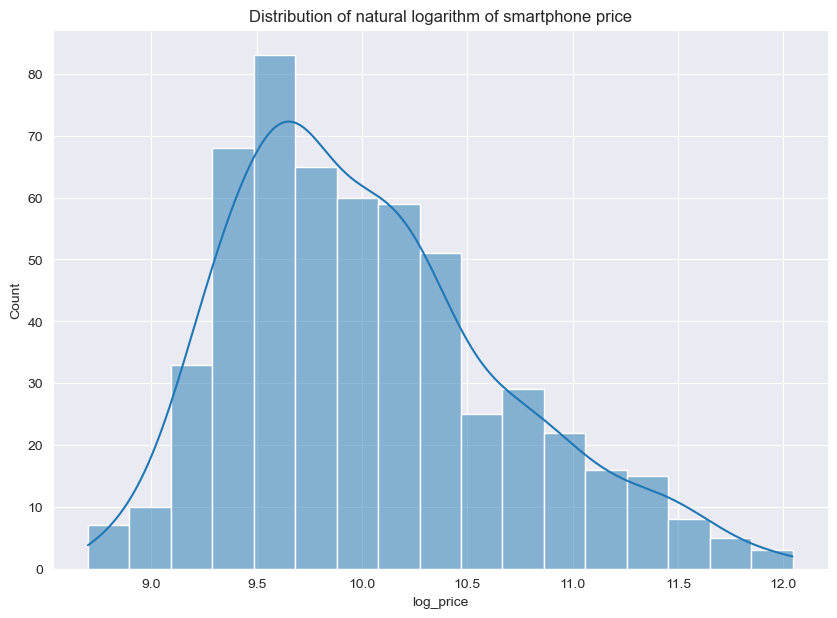

In [20]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.histplot(data=data, x='log_price', ax=ax,  kde=True)
ax.set_title('Distribution of natural logarithm of smartphone price');

 Оценим квантильную регрессию для квантилей логарифма цены смартофна уровней 0.1, 0.5, 0.9.

In [21]:
mod = smf.quantreg('log_price ~ ' + (' + '.join(X_columns)), data)
res = mod.fit(q=0.1, max_iter=10000)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:              log_price   Pseudo R-squared:               0.3317
Model:                       QuantReg   Bandwidth:                      0.2204
Method:                 Least Squares   Sparsity:                        1.295
Date:                Wed, 10 May 2023   No. Observations:                  559
Time:                        22:44:59   Df Residuals:                      527
                                        Df Model:                           31
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0068     49.395      0.000      1.000     -97.028      97.041
rating                0.0233      0.028      0.845      0.398      -0.031       0.077
disp_diag             0.2332      0.072      3.222      0.001       0.091       0.375
camera                0.0087      0.003      2.667      0.008       0.002       0.015
storage               0.0013      0.000      3.711      0.000       0.001       0.002
ram                   0.0245      0.015      1.616      0.107      -0.005       0.054
battery_capacity     -0.0300      0.036     -0.836      0.404      -0.101       0.041
year_of_release       0.0037      0.025      0.151      0.880      -0.045       0.052
density               0.0068      0.008      0.832      0.406      -0.009       0.023
Other_oper_syst       0.3398      0.605      0.562      0.574      -0.848       1.528
battery_type_LiPo    -0.0398      0.050     -0.800      0.424      -0.137       0.058
brand_Apple           1.2902      0.112     11.493      0.000       1.070       1.511
brand_BlackBerry      0.2704      0.160      1.693      0.091      -0.043       0.584
brand_Cubot           0.6606      0.299      2.211      0.027       0.074       1.248
brand_Gionee          0.4693      0.590      0.795      0.427      -0.690       1.629
brand_Google          0.4448      0.168      2.649      0.008       0.115       0.775
brand_HTC             0.2252      0.104      2.172      0.030       0.021       0.429
brand_Honor           1.0480      0.246      4.267      0.000       0.566       1.530
brand_Huawei          0.1234      0.067      1.830      0.068      -0.009       0.256
brand_Infinix         0.1515      0.092      1.654      0.099      -0.028       0.331
brand_LG              0.3762      0.147      2.564      0.011       0.088       0.664
brand_Lava           -0.0463      0.591     -0.078      0.938      -1.207       1.114
brand_Lenovo          0.1789      0.148      1.212      0.226      -0.111       0.469
brand_Motorola        0.7238      0.210      3.453      0.001       0.312       1.136
brand_Nokia           0.1720      0.105      1.638      0.102      -0.034       0.378
brand_OnePlus         1.1780      0.123      9.596      0.000       0.937       1.419
brand_Oppo            0.0015      0.085      0.018      0.986      -0.166       0.169
brand_Realme          0.1811      0.112      1.620      0.106      -0.039       0.401
brand_Samsung         0.3432      0.060      5.729      0.000       0.226       0.461
brand_Sony            0.5793      0.156      3.715      0.000       0.273       0.886
brand_Tecno           0.1470      0.083      1.779      0.076      -0.015       0.309
brand_Vivo            0.5733      0.246      2.328      0.020       0.090       1.057
=====================================================================================

The condition number is large, 4.46e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Видно, что в отличие от OLS с робастными ошибками в форме Уайта, в данном случае коэффициент при рейтинге, оперативной памяти, плотности экрана, а также при большинстве брендов - незначимы на любом разумном уровне значимости. В то время как коэффициент при емкости батареи и диагонале дисплея стали значимыми на любом разумном уровне значимости. Это можно объяснить тем, что квантиль уровня 0.1 в каком-то смысле является чем-то в духе нижней оценки цены телефона, имеющего заданные характеристики, поэтому со стороны спроса ее определяют в основном наиболее понятные и имеющие первоочередную важность для потребителя характеристики, а со стороны предложения - цены основных комплектующих.

В таком случае рейтинг смартфона в интернет-магазине не будет играть большой роли, поэтому он и оказывается незначимым, а год выпуска является инсрументом, отражающим качество комплектующих используемых в производстве, поэтому он оказывается значимым. Также логично ожидать, что нижняя оценка цены смартфона не привязана к бренду, так как потребители в большинстве смотрят на него не в первую очередь.

Теперь оценим моду условного распределения логарифма цены смартофна

In [22]:
mod = smf.quantreg('log_price ~ ' + (' + '.join(X_columns)), data)
res2 = mod.fit(q=0.5, max_iter=10**5)
res2.summary()

C:\Users\Alexandr\anaconda3\lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (100000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +


<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:              log_price   Pseudo R-squared:               0.3884
Model:                       QuantReg   Bandwidth:                      0.1967
Method:                 Least Squares   Sparsity:                       0.7310
Date:                Wed, 10 May 2023   No. Observations:                  559
Time:                        22:46:04   Df Residuals:                      527
                                        Df Model:                           31
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0021     34.101   6.22e-05      1.000     -66.989      66.993
rating                0.0495      0.023      2.122      0.034       0.004       0.095
disp_diag             0.0375      0.057      0.660      0.509      -0.074       0.149
camera                0.0054      0.002      2.304      0.022       0.001       0.010
storage               0.0027      0.000      8.510      0.000       0.002       0.003
ram                   0.0570      0.009      6.043      0.000       0.038       0.075
battery_capacity     -0.0220      0.033     -0.668      0.504      -0.087       0.043
year_of_release       0.0044      0.017      0.259      0.796      -0.029       0.038
density               0.0215      0.007      3.077      0.002       0.008       0.035
Other_oper_syst       0.1340      0.288      0.465      0.642      -0.432       0.700
battery_type_LiPo     0.0567      0.043      1.321      0.187      -0.028       0.141
brand_Apple           0.9143      0.097      9.421      0.000       0.724       1.105
brand_BlackBerry      0.0941      0.133      0.707      0.480      -0.167       0.355
brand_Cubot           0.2454      0.192      1.281      0.201      -0.131       0.622
brand_Gionee         -0.2763      0.264     -1.046      0.296      -0.795       0.243
brand_Google          0.3634      0.123      2.952      0.003       0.122       0.605
brand_HTC             0.0002      0.082      0.002      0.998      -0.160       0.161
brand_Honor           0.8818      0.170      5.179      0.000       0.547       1.216
brand_Huawei         -0.0490      0.062     -0.786      0.432      -0.171       0.073
brand_Infinix        -0.1774      0.076     -2.329      0.020      -0.327      -0.028
brand_LG              0.5153      0.115      4.473      0.000       0.289       0.742
brand_Lava           -0.5238      0.270     -1.938      0.053      -1.055       0.007
brand_Lenovo         -0.0611      0.121     -0.504      0.614      -0.299       0.177
brand_Motorola        0.5045      0.159      3.164      0.002       0.191       0.818
brand_Nokia          -0.0653      0.095     -0.691      0.490      -0.251       0.120
brand_OnePlus         0.5684      0.105      5.399      0.000       0.362       0.775
brand_Oppo           -0.0149      0.079     -0.188      0.851      -0.171       0.141
brand_Realme         -0.1536      0.098     -1.574      0.116      -0.345       0.038
brand_Samsung         0.1223      0.055      2.206      0.028       0.013       0.231
brand_Sony            0.4104      0.123      3.333      0.001       0.168       0.652
brand_Tecno          -0.0705      0.074     -0.949      0.343      -0.216       0.075
brand_Vivo            0.0650      0.171      0.381      0.704      -0.270       0.401
=====================================================================================

The condition number is large, 4.46e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Заметим, что теперь коэффициент при рейтинге смартофна стал значимым на 5% уровне значимости, а при переменной, отвечающей за год выпуска сматофна, по-прежнему остался значимым на любом разумном уровне значимости. При брендах Apple, OnePlus, LG, Infinix коэффициенты - значимы на любом разумном уровне значимости. Также заметим, что перед количеством мегапикселей камеры коэффициент получился незначимым на любом разумном уровне значимости.

In [23]:
mod = smf.quantreg('log_price ~ ' + (' + '.join(X_columns)), data)
res3 = mod.fit(q=0.9, max_iter=10**5)
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:              log_price   Pseudo R-squared:               0.4540
Model:                       QuantReg   Bandwidth:                      0.2246
Method:                 Least Squares   Sparsity:                        1.864
Date:                Wed, 10 May 2023   No. Observations:                  559
Time:                        22:46:04   Df Residuals:                      527
                                        Df Model:                           31
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0033     61.780   -5.4e-05      1.000    -121.368     121.361
rating                0.0997      0.044      2.267      0.024       0.013       0.186
disp_diag            -0.0084      0.112     -0.075      0.941      -0.229       0.213
camera                0.0104      0.004      2.686      0.007       0.003       0.018
storage               0.0022      0.001      4.294      0.000       0.001       0.003
ram                   0.0644      0.011      5.706      0.000       0.042       0.087
battery_capacity     -0.0619      0.062     -1.004      0.316      -0.183       0.059
year_of_release       0.0048      0.031      0.156      0.876      -0.055       0.065
density               0.0420      0.011      3.736      0.000       0.020       0.064
Other_oper_syst      -0.0951      0.864     -0.110      0.912      -1.793       1.603
battery_type_LiPo    -0.0366      0.078     -0.467      0.641      -0.191       0.117
brand_Apple           0.7995      0.195      4.107      0.000       0.417       1.182
brand_BlackBerry      0.1722      0.196      0.880      0.379      -0.212       0.557
brand_Cubot          -0.1385      0.442     -0.314      0.754      -1.006       0.729
brand_Gionee         -0.6406      0.849     -0.755      0.451      -2.308       1.027
brand_Google          0.7518      0.235      3.196      0.001       0.290       1.214
brand_HTC            -0.1376      0.147     -0.935      0.350      -0.427       0.151
brand_Honor           0.5985      0.349      1.714      0.087      -0.088       1.285
brand_Huawei         -0.0012      0.105     -0.012      0.991      -0.207       0.204
brand_Infinix        -0.4401      0.128     -3.435      0.001      -0.692      -0.188
brand_LG              0.5047      0.199      2.541      0.011       0.115       0.895
brand_Lava           -1.2051      0.858     -1.404      0.161      -2.891       0.481
brand_Lenovo         -0.4541      0.224     -2.026      0.043      -0.894      -0.014
brand_Motorola        0.7137      0.296      2.410      0.016       0.132       1.295
brand_Nokia          -0.4196      0.155     -2.699      0.007      -0.725      -0.114
brand_OnePlus         0.2261      0.184      1.232      0.219      -0.135       0.587
brand_Oppo           -0.2091      0.123     -1.706      0.089      -0.450       0.032
brand_Realme          0.1460      0.151      0.965      0.335      -0.151       0.443
brand_Samsung         0.0505      0.087      0.584      0.560      -0.120       0.221
brand_Sony            0.1717      0.243      0.706      0.481      -0.306       0.650
brand_Tecno           0.1641      0.117      1.399      0.163      -0.066       0.394
brand_Vivo           -0.3402      0.353     -0.965      0.335      -1.033       0.353
=====================================================================================

The condition number is large, 4.46e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Выведем таблицу с оценками регрессий

In [ ]:
stargazer = Stargazer([res, res2, res3])
Func = open("q_ols.html","w")

Func.write(stargazer.render_html())

Func.close()

Так как мы оцениваем квантиль уровня 0.9, то можно думать, что мы оцениваем, что определеяет верхнюю оценку цены смартфона с заданными характеристиками.

Ситуация с коэффициентами при рейтинге и годом выпуска смартфона повторяется - они оба значимы на 5% уровне значимости. Большинство брендов, наоборот, оказывают статистически незначимый эффект на цену смартфона, однако есть и контрпримеры: Apple, Google, Infinix, Nokia, Oppo.

Теперь посмотрим, как меняются оценки коэффициентов перед rating, disp_diag, brand_Samsung и brand_Apple при имзенении квантилей.

In [24]:
features = ['rating', 'year_of_release', 'brand_OnePlus', 'brand_Apple']
quantiles = np.linspace(0.05, 0.96, 20)


def fit_model(q):
    res = mod.fit(q=q, max_iter=10**5)
    ans = [q]
    for item in features:
        ans.extend([res.params[item]] + res.conf_int().loc[item].tolist())
    return ans

models = [fit_model(x) for x in quantiles]
cols = ['q']
for i, item in enumerate(features):
    cols.extend([f'x_{i}', f'lx_{i}', f'ux_{i}'])
models = pd.DataFrame(models, columns=cols)

print(models)


           q       x_0      lx_0      ux_0       x_1      lx_1      ux_1  \
0   0.050000 -0.001047 -0.059845  0.057751  0.003645 -0.041501  0.048792   
1   0.097895  0.018851 -0.035706  0.073408  0.003679 -0.042404  0.049763   
2   0.145789  0.008605 -0.044611  0.061820  0.003908 -0.041422  0.049237   
3   0.193684  0.010183 -0.039081  0.059447  0.003908 -0.035051  0.042868   
4   0.241579  0.023424 -0.023565  0.070414  0.003875 -0.031737  0.039487   
5   0.289474  0.036508 -0.010594  0.083610  0.003929 -0.031680  0.039538   
6   0.337368  0.053310  0.007347  0.099272  0.004006 -0.029551  0.037563   
7   0.385263  0.058880  0.013618  0.104142  0.004111 -0.029170  0.037393   
8   0.433158  0.041722 -0.002985  0.086428  0.004240 -0.028359  0.036838   
9   0.481053  0.039484 -0.006635  0.085603  0.004383 -0.029140  0.037906   
10  0.528947  0.051777  0.005536  0.098017  0.004398 -0.029294  0.038089   
11  0.576842  0.062126  0.016549  0.107704  0.004459 -0.028743  0.037660   
12  0.624737

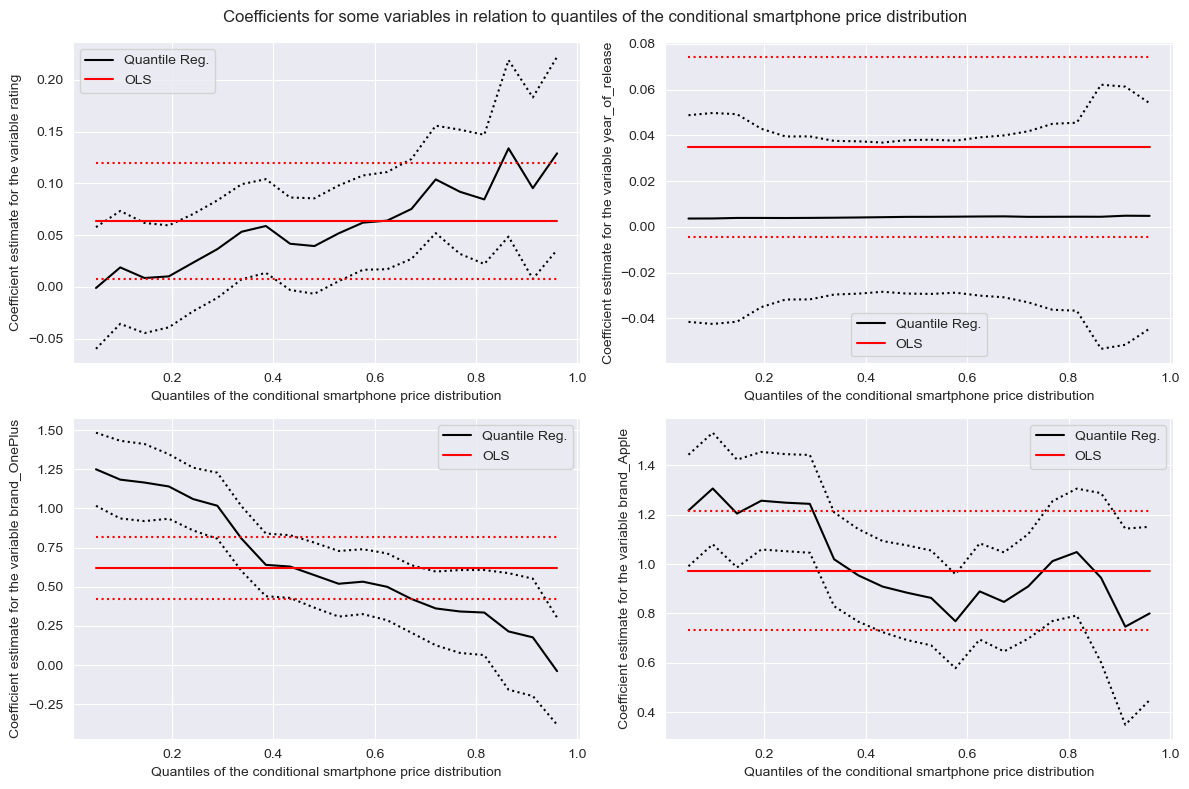

In [25]:
cols = list(data.drop(columns='log_price').columns)
idx_features = [cols.index(feature) for feature in features]

ols = smf.ols('log_price ~ ' + (' + '.join(X_columns)), data).fit().get_robustcov_results()
i = 0
fig, ax = plt.subplots(figsize=(12, 8), nrows=2, ncols=2)
for idx, item in zip(idx_features, features):
    ols_ci = ols.conf_int()[idx + 1 , :].tolist()
    ols_dict = dict(
    x=ols.params[idx + 1], lx=ols_ci[0], ux=ols_ci[1]
    )
    print()
    ax_cur = ax[i // 2][i % 2]
    n = models.shape[0]
    p1 = ax_cur.plot(models.q, models[f'x_{i}'], color="black", label="Quantile Reg.")
    p2 = ax_cur.plot(models.q, models[f'ux_{i}'], linestyle="dotted", color="black")
    p3 = ax_cur.plot(models.q, models[f'lx_{i}'], linestyle="dotted", color="black")
    p4 = ax_cur.plot(models.q, [ols_dict["x"]] * n, color="red", label="OLS")
    p5 = ax_cur.plot(models.q, [ols_dict["lx"]] * n, linestyle="dotted", color="red")
    p6 = ax_cur.plot(models.q, [ols_dict["ux"]] * n, linestyle="dotted", color="red")
    ax_cur.set_ylabel(f'Coefficient estimate for the variable {item}')
    ax_cur.set_xlabel("Quantiles of the conditional smartphone price distribution")
    ax_cur.legend()
    i += 1
fig.suptitle('Coefficients for some variables in relation to quantiles of the conditional smartphone price distribution')
plt.tight_layout();

Видно, что в с ростом уровня оцениваемого квантиля растет и коэффициент при рейтинге смартфона, то есть рейтинг в большей степени определяет верхнюю границу цены, которая может быть на него установлена, нежели ограничивает цену снизу. Оценка коэффициента при годе выпуска практически не меняется с изменением уровня квантиля, причем OLS-оценка данного коэффициента существенно превышает QR-оценку.

Оценка коэффициента при бренде OnePlus почти для всех квантилей ниже, чем соответсвующая МНК-оценка, то же верно и для бренда Apple. Это можно объяснить тем, что квантильная регрессия менее чувствительна к выбросам, а в датасете как раз были телефоны брендов Apple и OnePlus с очень высокой ценой.

# Прогноз

In [26]:
X_columns

['rating',
 'disp_diag',
 'camera',
 'storage',
 'ram',
 'battery_capacity',
 'year_of_release',
 'density',
 'Other_oper_syst',
 'battery_type_LiPo',
 'brand_Apple',
 'brand_BlackBerry',
 'brand_Cubot',
 'brand_Gionee',
 'brand_Google',
 'brand_HTC',
 'brand_Honor',
 'brand_Huawei',
 'brand_Infinix',
 'brand_LG',
 'brand_Lava',
 'brand_Lenovo',
 'brand_Motorola',
 'brand_Nokia',
 'brand_OnePlus',
 'brand_Oppo',
 'brand_Realme',
 'brand_Samsung',
 'brand_Sony',
 'brand_Tecno',
 'brand_Vivo']

In [27]:
ols = smf.ols('log_price ~ ' + (' + '.join(X_columns)), data).fit().get_robustcov_results()

Возьмем характеристики [Xiaomi Poco X3 6GB/64GB](http://web.archive.org/web/20211201100938mp_/https://www.priceinkenya.com/product/xiaomi-poco-x3-6gb64gb), [OnePlus 9R 12GB/256GB](http://web.archive.org/web/20210420125400mp_/https://www.priceinkenya.com/product/oneplus-9r-12gb256gb), [Apple iPhone SE (2020) 256GB](http://web.archive.org/web/20211024223817mp_/https://www.priceinkenya.com/product/apple-iphone-se-2020-256gb)

In [29]:
# specs_score = 62%
char = np.array([
    [ 5, 6.67, 20, 64, 6, 6000/1000, 2020, 1080*2400 / (6.67)**2 /10000, 0, 0] + [0] * 21,
    [3, 6.55, 16, 256, 12, 4500/1000, 2021, 1080*2400 / (6.55)**2/10000, 0, 0] + [0] * 21,
    [4.5, 4.7, 12, 256, 3, 1821/1000, 2020, 750*1334 / (4.7)**2/10000, 0, 0] + [0] * 21,
    ])
char[1, 24] = 1
char[2, 10] = 1
logprice_true = np.log([25499, 68999, 72000])
df_new = pd.DataFrame(char)
df_new.columns = X_columns.copy()
df_new

,rating,disp_diag,camera,storage,ram,battery_capacity,year_of_release,density,Other_oper_syst,battery_type_LiPo,...,brand_Lenovo,brand_Motorola,brand_Nokia,brand_OnePlus,brand_Oppo,brand_Realme,brand_Samsung,brand_Sony,brand_Tecno,brand_Vivo
0,5.0,6.67,20.0,64.0,6.0,6.000,2020.0,5.826172,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.0,6.55,16.0,256.0,12.0,4.500,2021.0,6.041606,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.5,4.70,12.0,256.0,3.0,1.821,2020.0,4.529199,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Прогноз OLS

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
for item, jtem in zip(logprice_true, ols.predict(df_new)):
    print('Predicted expectation of log_price =', jtem)
    print('Real price =', item)
    print()
print('MSE =', mean_squared_error(logprice_true, np.array(ols.predict(df_new)), squared=True))
print('MAE =', mean_absolute_error(logprice_true, np.array(ols.predict(df_new))))

Predicted expectation of log_price = 10.00858955027337
Real price = 10.146394514691288

Predicted expectation of log_price = 11.32277026305158
Real price = 11.141847290720753

Predicted expectation of log_price = 11.281083492784731
Real price = 11.184421397998193

MSE = 0.020355630234588883
MAE = 0.1384633438450944


#### Прогноз QR

In [34]:
mod = smf.quantreg('log_price ~ ' + (' + '.join(X_columns)), data).fit(q=0.1, max_iter=10**5)
for item, jtem in zip(logprice_true, res.predict(df_new)):
    print('Predicted quantile level 0.1 of log_price =', jtem)
    print('True log_price =', item)
    print()

print('MSE =', mean_squared_error(logprice_true, np.array(res.predict(df_new)), squared=True))
print('MAE =', mean_absolute_error(logprice_true, np.array(res.predict(df_new))))

Predicted quantile level 0.1 of log_price = 9.460481413021787
True log_price = 10.146394514691288

Predicted quantile level 0.1 of log_price = 10.983676058107704
True log_price = 11.141847290720753

Predicted quantile level 0.1 of log_price = 10.51023895855441
True log_price = 11.184421397998193

MSE = 0.31667229450752515
MAE = 0.5060889245754439


In [36]:
for item, jtem in zip(logprice_true, res2.predict(df_new)):
    print('Predicted median log_price =', jtem)
    print('True log_price =', item)
    print()
print('MSE =', mean_squared_error(logprice_true, np.array(res2.predict(df_new)), squared=True))
print('MAE =', mean_absolute_error(logprice_true, np.array(res2.predict(df_new))))

Predicted median log_price = 9.997288626954518
True log_price = 10.146394514691288

Predicted median log_price = 11.333438728185975
True log_price = 11.141847290720753

Predicted median log_price = 11.172158808348538
True log_price = 11.184421397998193

MSE = 0.01969673859089206
MAE = 0.11765330495054904


In [37]:
mod = smf.quantreg('log_price ~ ' + (' + '.join(X_columns)), data).fit(q=0.9, max_iter=10**5)
for item, jtem in zip(logprice_true, res3.predict(df_new)):
    print('Predicted quantile level 0.9 of log_price =', jtem)
    print('True log_price =', item)
    print()

print('MSE =', mean_squared_error(logprice_true, np.array(res3.predict(df_new)), squared=True))
print('MAE =', mean_absolute_error(logprice_true, np.array(res3.predict(df_new))))

Predicted quantile level 0.9 of log_price = 10.711485038555143
True log_price = 10.146394514691288

Predicted quantile level 0.9 of log_price = 11.622057346356456
True log_price = 11.141847290720753

Predicted quantile level 0.9 of log_price = 11.836891941016553
True log_price = 11.184421397998193

MSE = 0.3252156024003485
MAE = 0.565923707505973
